# PLN - Modelo de processo de linguagêm natural
**Análise de sentimento tweets - Vacina Pfizer**

In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.9.7


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

pandas    : 1.3.4
watermark : 2.3.0
matplotlib: 3.4.3
seaborn   : 0.11.2
plotly    : 5.5.0
numpy     : 1.20.3



In [4]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

In [5]:
# Carregando a base de dados

df = pd.read_csv("Vaccine Tweets-Pfizer.csv")

In [6]:
# Exibido 5 primeiros dados
df.head()

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
0,0,Historically there have been barriers in the h...,0.450000,0.35,Positive
1,1,Honored and PfizerProud to see the trust that ...,0.066667,0.00,Neutral
2,2,COVID19 illuminated the need to improve equity...,0.000000,0.00,Neutral
3,3,Today we published a landmark study on diversi...,0.000000,0.00,Neutral
4,4,They volunteered🤚 to help change the world🌎 . ...,0.300000,0.20,Positive


In [7]:
# Exibido 5 últimos dados 
df.tail(5)

,Unnamed: 0,Tweet,Subjectivity,Polarity,Score
2850,2851,Did you know we launched a database to track a...,0.800,0.400,Positive
2851,2852,We’re at AtlanticCSR to talk about partnership...,0.500,0.500,Positive
2852,2853,"Gastric cancer, also known as stomachcancer, i...",0.500,0.100,Positive
2853,2854,Learn about the value of vaccines in preventin...,0.000,0.000,Neutral
2854,2855,Bacteria like S. aureus are becoming increasin...,0.425,0.175,Positive


In [8]:
# Número de linhas e colunas
df.shape

(2855, 5)

In [9]:
# Exibido tipos de dados
df.dtypes

Unnamed: 0        int64
Tweet            object
Subjectivity    float64
Polarity        float64
Score            object
dtype: object

In [10]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2855 non-null   int64  
 1   Tweet         2855 non-null   object 
 2   Subjectivity  2855 non-null   float64
 3   Polarity      2855 non-null   float64
 4   Score         2855 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 111.6+ KB


In [11]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 2855
Números de colunas: 5


In [12]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 Unnamed: 0      2855
Tweet           2751
Subjectivity     301
Polarity         321
Score              3
dtype: int64


In [13]:
# Verificando a polaridade
df.Polarity.value_counts()

 0.000000    1126
 0.500000     227
 0.250000     123
 0.800000     106
 0.136364      74
             ... 
-0.050000       1
 0.400000       1
-0.093750       1
 0.487500       1
 0.205000       1
Name: Polarity, Length: 321, dtype: int64

In [14]:
# Renomeando colunas
df.columns = ["Usuario",
              "Text",
              "Subjetividade",
              "Polaridade",
              "Sentimento"]
df.head()

,Usuario,Text,Subjetividade,Polaridade,Sentimento
0,0,Historically there have been barriers in the h...,0.450000,0.35,Positive
1,1,Honored and PfizerProud to see the trust that ...,0.066667,0.00,Neutral
2,2,COVID19 illuminated the need to improve equity...,0.000000,0.00,Neutral
3,3,Today we published a landmark study on diversi...,0.000000,0.00,Neutral
4,4,They volunteered🤚 to help change the world🌎 . ...,0.300000,0.20,Positive


In [18]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Usuario,2855.0,1427.698424,824.676764,0.0,713.5,1428.000000,2141.50,2855.0
Subjetividade,2855.0,0.381149,0.335380,0.0,0.0,0.400000,0.60,1.0
Polaridade,2855.0,0.172970,0.260051,-0.8,0.0,0.066667,0.35,1.0


Text(0.5, 1.0, 'Matriz de correlação')

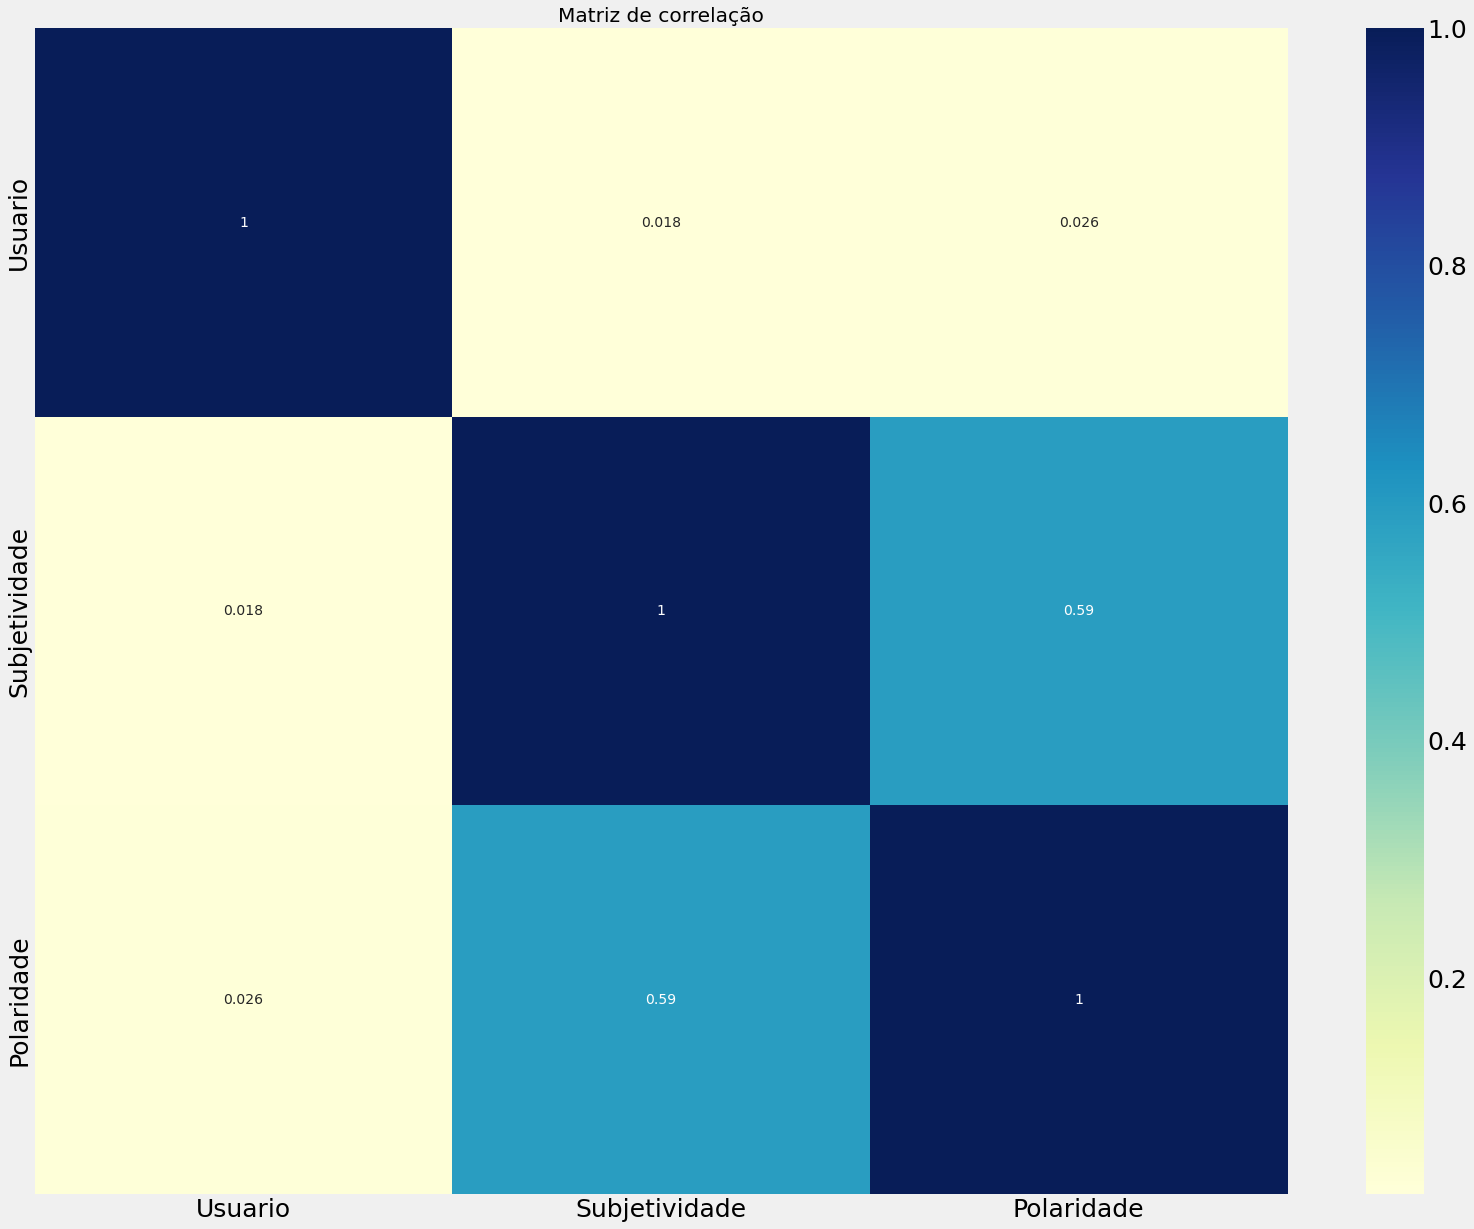

In [19]:
# Gráfico da matriz de correlação


ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

# Análise de dados

Text(0, 0.5, 'Total')

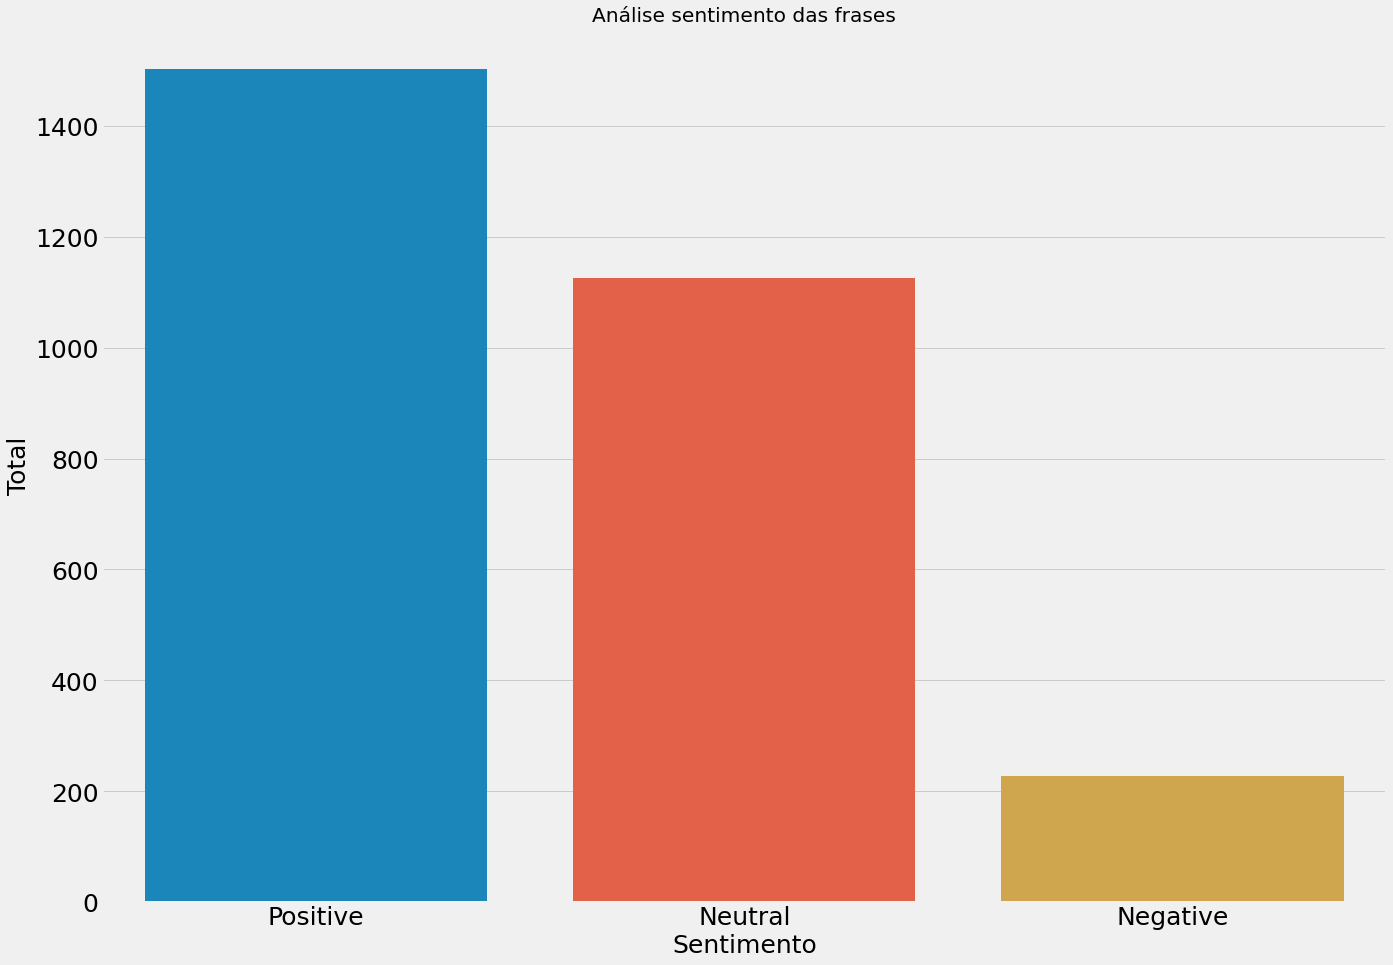

In [24]:
# Gráfico de Análise sentimento

plt.figure(figsize=(20.5,15))

plt.title("Análise sentimento das frases")
ax = sns.countplot(df["Sentimento"])
plt.xlabel("Sentimento")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

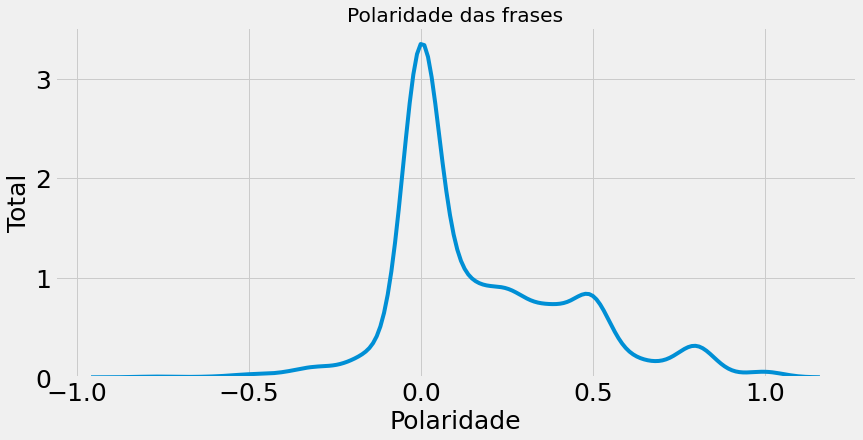

In [26]:
# Gráfico polaridade das frases

plt.figure(figsize=(12.8,6))

plt.title("Polaridade das frases")
ax = sns.kdeplot(df["Polaridade"])
plt.xlabel("Polaridade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

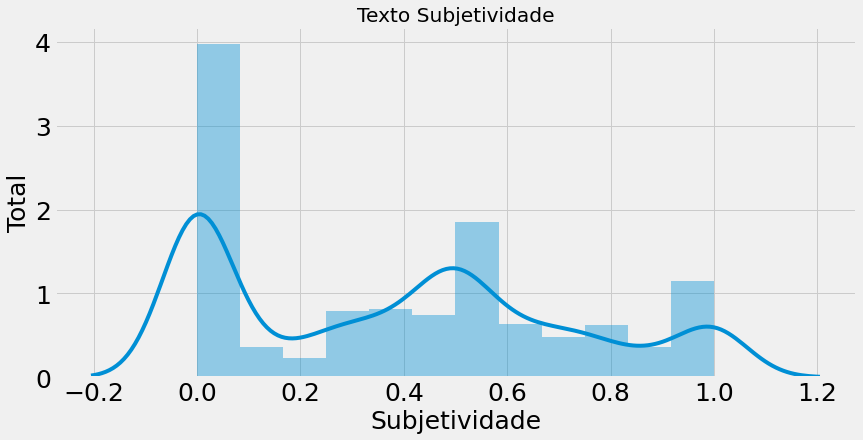

In [27]:
# Gráfico de texto subjetividade

plt.figure(figsize=(12.8,6))

plt.title("Texto Subjetividade")
ax = sns.distplot(df["Subjetividade"])
plt.xlabel("Subjetividade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

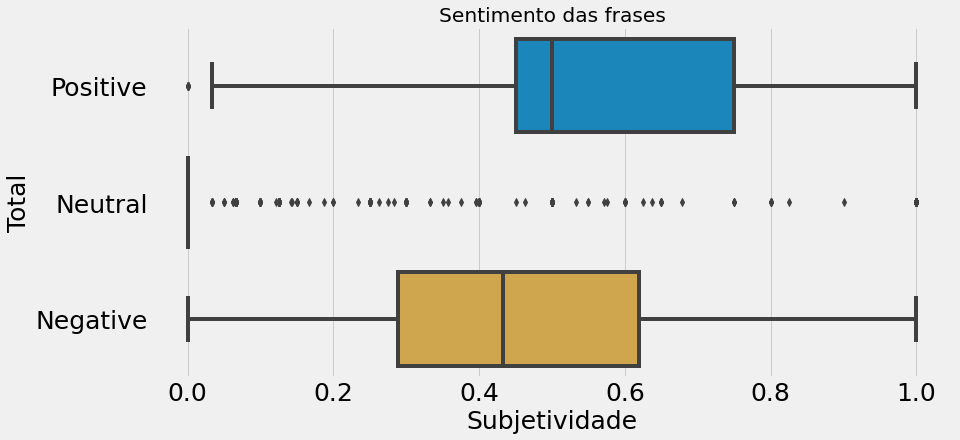

In [31]:
# Gráfico subjetividade e sentimento

plt.figure(figsize=(12.8,6))

ax = sns.boxplot(x="Subjetividade", y="Sentimento", data = df)
plt.title("Sentimento das frases")
plt.xlabel("Subjetividade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

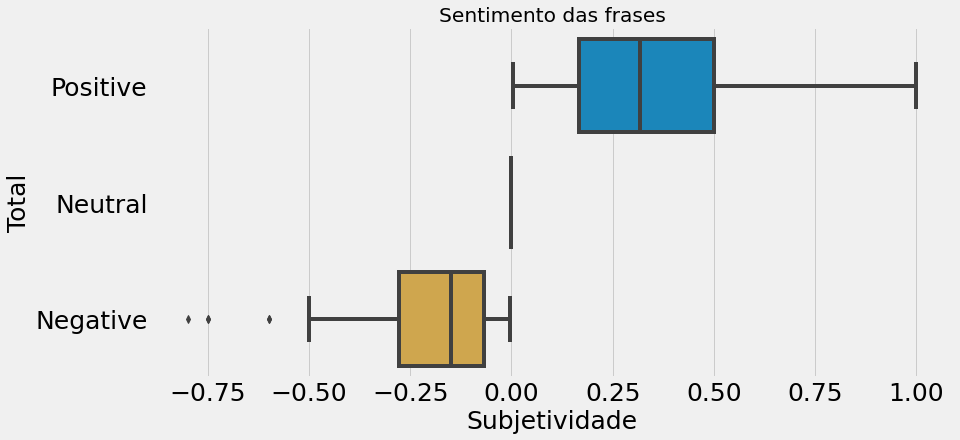

In [33]:
# Gráfico de polaridade sentimento

plt.figure(figsize=(12.8,6))

ax = sns.boxplot(x="Polaridade", y="Sentimento", data = df)
plt.title("Sentimento das frases")
plt.xlabel("Subjetividade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

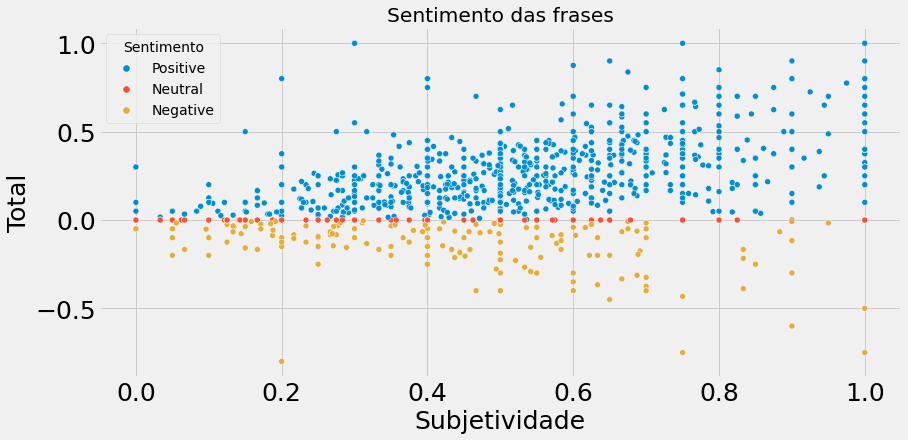

In [34]:
# Gráfico scatterplot de sentimento
plt.figure(figsize=(12.8,6))

ax = sns.scatterplot(x="Subjetividade", y="Polaridade", data=df, hue="Sentimento")
plt.title("Polaridade")
plt.xlabel("Subjetividade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

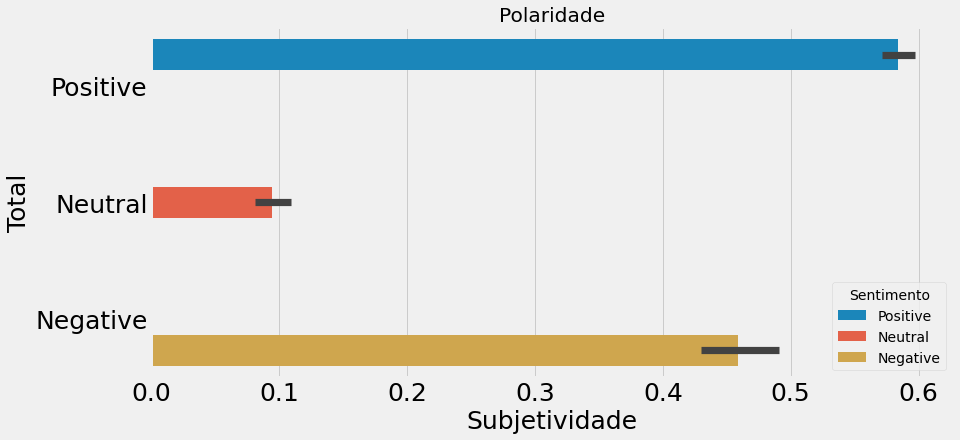

In [37]:
# Gráfico de sentimento e subjetividade
plt.figure(figsize=(12.8,6))

ax = sns.barplot(x="Subjetividade", y="Sentimento", data = df, hue="Sentimento")
plt.title("Polaridade")
plt.xlabel("Subjetividade")
plt.ylabel("Total")

In [ ]:
# Gráfico nuvem de palavras
import itertools
from wordcloud import WordCloud

words = ' '.join([tweet for tweet in df['Text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.figure(figsize=(18.8, 16))
plt.imshow(wordCloud)
plt.show()

# Pré - processamento dos dados

In [38]:
# Contagem de texto
df.Text.count()

2855

In [39]:
# Retirando palavras duplicadas
df.drop_duplicates(["Text"], inplace = True)
df.Text.count()

2751

# Treino e Teste

- Treino e teste da base de dados da coluna texto, sentimento

In [40]:
# Variável para teste
train = df["Text"]

# Variável para treino
test = df["Sentimento"]

In [41]:
# Total de linhas e colunas dados variável x
train.shape

(2751,)

In [42]:
# Total de linhas e colunas dados variável y
test.shape

(2751,)

In [43]:
# Download stopwords, Punkt

import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
# Dados de limpeza para modelo PLN

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Removendo stop words
def remove_stop_words(instancia):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# stemming no dataset
def text_stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()

    palavras = []

    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

# Limpando base de dados
def dados_limpos(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

# Redução de palavras flexionadas
def Lemmatization(instancia):
    
    palavras = []
    
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
        return (" ".join(palavras))

# Pré-processamento removendo stopword e removendo caracteres indesejados.
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [49]:
train = [Preprocessing(i) for i in train]
train[:20]

['historically there have been barriers in the healthcare community to fair representation and equity in…',
 'honored and pfizerproud to see the trust that the public has placed in us reflected in this survey we never forge…',
 'covid19 illuminated the need to improve equity in clinicaltrials next week, our chief development officer…',
 'today we published landmark study on diversity in our clinicaltrials we conducted this study to set benchmar…',
 "they volunteered🤚 to help change the world🌎 we're sharing real kids thanking the real heroes, the 1215 year old…",
 'bladder cancer is most common in patients over 65 learn more about our commitment to addressing gaps in care t…',
 'since 1971 has supported the mental health of black nurses supported by the pfizer foundation, nbna is a…',
 'we are resolute in support of the timetoactcancer initiative come together and join 20 countries…',
 'at pfizer, we believe partnership is key to advancing exciting areas of breaking science with the hel

In [60]:
# Word tokenize - E o processo de devidir uma string, textos e uma lista tokens 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

text = "Passei no concurso da Marinha"

toke = word_tokenize(text)
tweet_tokenizer = TweetTokenizer()
tweet_tokenizer_tt = tweet_tokenizer.tokenize(text)
print(toke)
print(tweet_tokenizer_tt)

['Passei', 'no', 'concurso', 'da', 'Marinha']
['Passei', 'no', 'concurso', 'da', 'Marinha']


In [55]:
# Modelo criado para classificar tweets positivos, negativos
# CountVectorizer criar um vocabulário de palavras e retornar em vetor 
from sklearn.feature_extraction.text import CountVectorizer

vet = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)
vet_train = vet.fit_transform(train)
vet_train.shape

(2751, 6477)

# Modelo - 1 Regressão logistica

In [62]:
# Modelo Regressão logística- 1
# Modelo machine learning - Regressão logística

# Importação da biblioteca sklearn o modelo
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_logistic = LogisticRegression()

# Treinamento do modelo
model_logistic_fit = model_logistic.fit(vet_train, test)

# Score do modelo
model_logistic_scor = model_logistic.score(vet_train, test)

# Print do score modelo
print("Model - Logistic Regression: %.2f" % (model_logistic_scor * 100))

Model - Logistic Regression: 99.89


In [63]:
# Probabilidade do modelo
model_logistic_prob = model_logistic.predict_log_proba(vet_train)
model_logistic_prob

array([[-2.57550203, -1.08920055, -0.53205094],
       [-5.79066086, -0.06214152, -2.86130353],
       [-6.21180074, -0.05884251, -2.8978957 ],
       ...,
       [-2.33396813, -3.07703869, -0.15432435],
       [-4.71925074, -0.05186622, -3.17912007],
       [-3.37451708, -2.01852274, -0.18282515]])

In [64]:
# Previsão do modelo
model_logistic_pred = model_logistic.predict(vet_train)
model_logistic_pred

array(['Positive', 'Neutral', 'Neutral', ..., 'Positive', 'Neutral',
       'Positive'], dtype=object)

In [66]:
# Função de negação para modelo

def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    
    resultado = []
    palavras = texto.split()
    
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    return (" ".join(resultado))

In [67]:
# Pipeline modelo machine learning
from sklearn import svm
from sklearn.pipeline import Pipeline

model_reg_log = Pipeline([ # Pipeline
    ('counts', CountVectorizer()), # CountVectorizer
    ('classifier', LogisticRegression()) # Modelo de classificação de regressão logística 1
])
model_reg_log.fit(train, test) # Treinamento do modelo RL

model_reg_log_simples = Pipeline([ # Pipeline simples 
  ('counts', CountVectorizer()), # CountVectorizer
  ('classifier', LogisticRegression()) # Modelo de classificação de regressão logística 2 - Sentimento
])
model_reg_log_simples.fit(train, test)

model_reg_log_negacoes = Pipeline([ # Pipeline para negativos
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))), # Treinamento tokenizer 
  ('classifier', LogisticRegression()) # Modelo de classificação de regressão logística 3 - Negativo 
])

pipeline_model = model_reg_log_negacoes.fit(train, test) # treinamento do Pipeline
pipeline_model

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x0000024A0EA0FF70>)),
                ('classifier', LogisticRegression())])

In [68]:
# Accuracy do modelo regressão logistica com pipeline

from sklearn import metrics
from sklearn.model_selection import cross_val_predict

validacao_cruzada_Reg = cross_val_predict(model_reg_log, train, test)
validacao_cruzada_Reg

accuracy = metrics.accuracy_score(test, validacao_cruzada_Reg)
print("Accuracy model Logistic Regression: %.2f" % (accuracy * 100))

Accuracy model Logistic Regression: 79.10


In [70]:
# Regressão logistica - Modelo

sentimento=['Positivo',
            'Negativo',
            'Neutro']

print(pd.crosstab(test, validacao_cruzada_Reg, rownames = ["Real"], colnames=["Predito"], margins = True))

Predito   Negative  Neutral  Positive   All
Real                                       
Negative        51      103        65   219
Neutral          9      913       161  1083
Positive        11      226      1212  1449
All             71     1242      1438  2751


In [71]:
# Modelo - Regressão logistica

def metricas_pipeline(model_logistic, train, test):
    validacao_cruzada_Reg = cross_val_predict(model_logistic, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada_Reg, test))

print("Model pipeline Simples:", metricas_pipeline(model_reg_log, train, test))
print("Model pipeline negações:", metricas_pipeline(model_reg_log_simples, train, test))
print("Model pipeline SVM simples:", metricas_pipeline(model_reg_log_negacoes, train, test))

Model pipeline Simples: Acurácia do modelo: 0.8040712468193384
Model pipeline negações: Acurácia do modelo: 0.8040712468193384
Model pipeline SVM simples: Acurácia do modelo: 0.5474372955288986


# Modelo - 2 Naive bayes

In [72]:
# Modelo machine learning - 2

# Importação da biblioteca sklearn o modelo Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Nome do algoritmo M.L
model_naive_bayes = MultinomialNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(vet_train, test)

# Score do modelo
model_naive_bayes_scor = model_naive_bayes.score(vet_train, test)
print("Model - Naive Bayes: %.2f" % (model_naive_bayes_scor * 100))

Model - Naive Bayes: 91.97


In [73]:
# Probabilidade do modelo

model_naive_bayes_prob = model_naive_bayes.predict_proba(vet_train).round(2)
print(model_naive_bayes_prob)

[[0.   0.21 0.79]
 [0.   0.99 0.01]
 [0.   0.98 0.02]
 ...
 [0.   0.   1.  ]
 [0.   0.95 0.05]
 [0.   0.01 0.99]]


In [74]:
# Função de negação para modelo

def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    
    resultado = []
    palavras = texto.split()
    
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    return (" ".join(resultado))

In [75]:
model_pipeline_simples = Pipeline([ # Pipeline naive bayes
  ('counts', CountVectorizer()), # CountVectorizer treinamneto
  ('classifier', MultinomialNB()) # Modelo naive bayes classificação
])
model_pipeline_simples.fit(train, test) # Treinamento pipeline 1 

model_pipeline_negacoes = Pipeline([ # Pipeline negação 
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))), # Treinamento tokenizer 
  ('classifier', MultinomialNB()) # Modelo naive bayes classificação
])
model_pipeline_negacoes.fit(train, test) # Treinamento pipeline 1 

model_pipeline_svm_simples = Pipeline([ # Pipeline SVM - 1
    ("counts", CountVectorizer()),  # Treinamento tokenizer 
    ("classifier", svm.SVC(kernel = "linear")) # SVM Modelo 
])
model_pipeline_svm_simples.fit(train, test) # Treinamento pipeline 2 

model_pipeline_svm_negacoes = Pipeline([ # Pipeline SVM - 2 Negações
    ("counts", CountVectorizer(tokenizer = lambda text: marque_negacao(text))), # Treinamento tokenizer 
    ("classifier", svm.SVC(kernel = "linear")) # SVM Modelo
])
model_pipeline_svm_negacoes.fit(train, test) # Treinamento do Pipeline 2 - Negaçoes

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x0000024A0B626430>)),
                ('classifier', SVC(kernel='linear'))])

# Avaliação do modelo PLN

In [76]:
# Validação cruzada modelo
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

validacao_cruzada = cross_val_predict(model_pipeline_simples, train, test)
validacao_cruzada

array(['Positive', 'Neutral', 'Neutral', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [78]:
# Accuracy do modelo validacao cruzada

accuracy = metrics.accuracy_score(test, validacao_cruzada)
print("Accuracy model Naive bayes: %.2f" % (accuracy * 100))

Accuracy model Naive bayes: 69.65


In [80]:
# Matriz sentimento

sentimento=['Positivo',
            'Negativo',
            'Neutro']

print("Matriz de sentimento")
print()
print(pd.crosstab(test, validacao_cruzada, rownames = ["Real"], colnames=["Predito"], margins = True))

Matriz de sentimento

Predito   Negative  Neutral  Positive   All
Real                                       
Negative        13       60       146   219
Neutral          6      595       482  1083
Positive         6      135      1308  1449
All             25      790      1936  2751


In [81]:
# Modelo - metricas do modelo 

def metricas_pipeline(model_naive_bayes, train, test):
    validacao_cruzada = cross_val_predict(model_naive_bayes, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada, test))

print("Model pipeline Simples:", metricas_pipeline(model_pipeline_simples, train, test))
print("Model pipeline negações:", metricas_pipeline(model_pipeline_negacoes, train, test))
print("Model pipeline SVM simples:", metricas_pipeline(model_pipeline_svm_simples, train, test))
print("Model pipeline SVM negacoes:", metricas_pipeline(model_pipeline_svm_negacoes, train, test))

Model pipeline Simples: Acurácia do modelo: 0.7011995637949836
Model pipeline negações: Acurácia do modelo: 0.5325336241366776
Model pipeline SVM simples: Acurácia do modelo: 0.8269720101781171
Model pipeline SVM negacoes: Acurácia do modelo: 0.5481643038894948
